In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

DATASET_PATH = r"C:\Users\krish\OneDrive\Desktop\ai_cam_db\dataset"

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


In [3]:
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH + "/training",
    target_size=(224, 224),   
    batch_size=16,
    class_mode='binary',
    subset='training'
)

Found 323 images belonging to 2 classes.


In [4]:
val_generator = train_datagen.flow_from_directory(
    DATASET_PATH + "/training",
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)

Found 79 images belonging to 2 classes.


In [5]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)


In [6]:
for layer in base_model.layers:
    layer.trainable = False

#  Custom Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

In [7]:
model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:

# Train
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15   
)


C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.5793 - loss: 0.9266

C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 940ms/step - accuracy: 0.5794 - loss: 0.9219 - val_accuracy: 0.7468 - val_loss: 0.4964
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 570ms/step - accuracy: 0.6924 - loss: 0.6137 - val_accuracy: 0.8228 - val_loss: 0.4188
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 587ms/step - accuracy: 0.8151 - loss: 0.4303 - val_accuracy: 0.8228 - val_loss: 0.3974
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 607ms/step - accuracy: 0.8238 - loss: 0.3891 - val_accuracy: 0.8861 - val_loss: 0.3416
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 600ms/step - accuracy: 0.7843 - loss: 0.4229 - val_accuracy: 0.8101 - val_loss: 0.3504
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 573ms/step - accuracy: 0.8589 - loss: 0.3306 - val_accuracy: 0.8354 - val_loss: 0.3675
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 571ms/step - accuracy: 0.8949 - loss: 0.2952 - val_accuracy: 0.8608 - val_loss: 0.3597
Epoch 8/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 584ms/step - accuracy: 0.9092 - loss: 0.2667 - val_accuracy: 0.810

In [9]:
model.save("seatbelt_detector.h5")

class_labels = {v: k for k, v in train_generator.class_indices.items()}


In [10]:
img_path = r'C:\Users\krish\OneDrive\Desktop\ai_cam_db\testing_with_belt.png'


In [11]:
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [12]:
prediction = model.predict(img_array)[0][0]

predicted_class = 1 if prediction > 0.5 else 0
label = class_labels[predicted_class]
confidence = prediction*100 if predicted_class==1 else (1-prediction)*100

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step



Prediction: with_seatbelt
Confidence: 95.20%


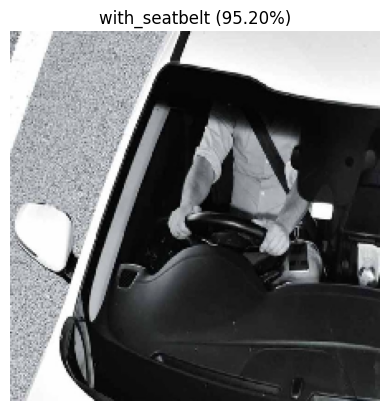

In [13]:
print(f"\nPrediction: {label}")
print(f"Confidence: {confidence:.2f}%")

plt.imshow(img)
plt.title(f"{label} ({confidence:.2f}%)")
plt.axis("off")
plt.show()
